In [2]:
import torch
import torchvision
import torchaudio
import os
from os.path import isfile, join, isdir, exists
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

In [8]:
import mido

directory = "maestro-v3.0.0"
save_directory = "mid"
#if not exists(save_directory):
    
#    os.mkdir("./mel")
    
dirnames = [f for f in os.listdir(directory) if isdir(join(directory, f))]


for d in dirnames:
    if not exists(join(save_directory, d)):
        os.mkdir(join(save_directory, d))


fnames = []
for dirs in dirnames:
    for f in os.listdir(join(directory, dirs)):
        fnames.append(join(dirs, f))

print(len(fnames))

for fname in fnames:
    f = fname
    fname = join(directory, fname)
    if(fname[-4:] != 'midi'):
        continue
    #print(fname)
    mid = mido.MidiFile(fname, clip=True)
    
    tempo = 500000
    for msg in mid.tracks[0]:
        if(msg.type == 'set_tempo'):
            tempo = msg.tempo
            if(tempo != 500000):               
                print(tempo)
            break

    mlen = mid.length
    mticks = mid.ticks_per_beat
    #print(mticks)
    out = np.zeros((88, int(mido.second2tick(mlen, mticks, tempo))+1), dtype=np.int8)
    indxs = np.zeros(88)
    curtime = 0
    
    

    for msg in mid.tracks[1]:            
        
        for i in range(msg.time):
            out[:, curtime + i] = indxs # maybe copy
        curtime += msg.time

        if msg.type == 'note_on':
            on_value = 1 if msg.velocity != 0 else 0
            if(on_value):
                indxs[msg.note - 21] = 1
            else:
                indxs[msg.note - 21] = 0

    while(curtime < out.shape[1]):
        out[:, curtime] = indxs
        curtime += 1
        
    t = int(mido.second2tick(10, mticks, tempo))+1
    '''
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(out[:, 0:t], aspect='auto')
    '''
    
    for i in range(0, out.shape[1], t):
        if(i+t > out.shape[1]):
            break
        #torch.save(torch.tensor(out[:, i:i+t]), save_directory+"/"+f[:-5]+"_"+str(i//(t))+".pt")


1276


KeyboardInterrupt: 

In [10]:
import mido

directory = "maestro-v3.0.0"
save_directory = "mid"
#if not exists(save_directory):
    
#    os.mkdir("./mel")
    
dirnames = [f for f in os.listdir(directory) if isdir(join(directory, f))]





fnames = []
for dirs in dirnames:
    for f in os.listdir(join(directory, dirs)):
        fnames.append(join(dirs, f))


for fname in fnames:
    f = fname
    fname = join(directory, fname)
    if(fname[-4:] != 'midi'):
        continue
    #print(fname)
    mid = mido.MidiFile(fname, clip=True)
    mticks = mid.ticks_per_beat
    if(mticks == 384):
        continue
    tempo = 500000
    for msg in mid.tracks[0]:
        if(msg.type == 'set_tempo'):
            tempo = msg.tempo
            break

    mlen = mid.length
    
    #print(mticks)
    out = np.zeros((88, int(mido.second2tick(mlen, mticks, tempo))+1), dtype=np.int8)
    indxs = np.zeros(88)
    curtime = 0
    
    

    for msg in mid.tracks[1]:            
        
        for i in range(msg.time):
            out[:, curtime + i] = indxs # maybe copy
        curtime += msg.time

        if msg.type == 'note_on':
            on_value = 1 if msg.velocity != 0 else 0
            if(on_value):
                indxs[msg.note - 21] = 1
            else:
                indxs[msg.note - 21] = 0

    while(curtime < out.shape[1]):
        out[:, curtime] = indxs
        curtime += 1
        
    t = int(mido.second2tick(10, mticks, tempo))

    #print(mticks)
    '''
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(out[:, 0:t], aspect='auto')
    '''
    
    for i in range(0, out.shape[1], t):
        if(i+t > out.shape[1]):
            break
        #
        if(mticks != 384):
            tempt = int(mido.second2tick(10, 384, tempo))
            # fig, ax = plt.subplots(figsize=(6,6))
            # ax.imshow(out[:, i:i+t], aspect='auto')
            temp = sk.transform.resize(out[:, i:i+t], (88, tempt), order=0)
            # fig, ax = plt.subplots(figsize=(6,6))
            # ax.imshow(temp, aspect='auto')
            # print(temp.shape)
            torch.save(torch.tensor(temp.astype(np.int8)), save_directory+"/"+f[:-5]+"_"+str(i//(t))+".pt")
        else:    
            torch.save(torch.tensor(out[:, i:i+t]), save_directory+"/"+f[:-5]+"_"+str(i//(t))+".pt")

(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)


/tmp/ipykernel_52496/3263976662.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6,6))


(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)
(88, 7680)


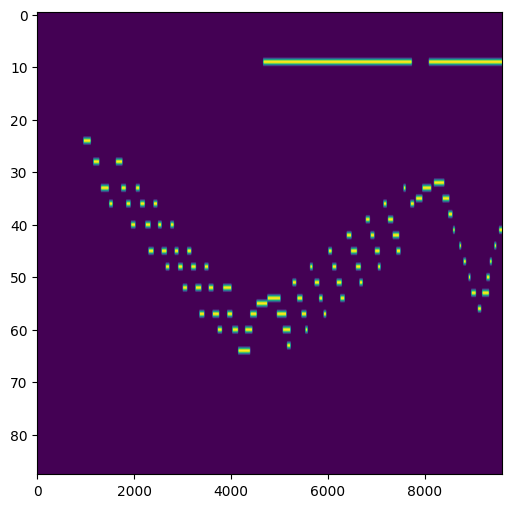

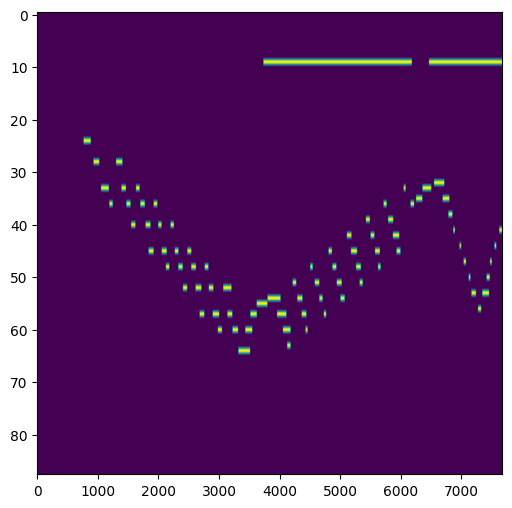

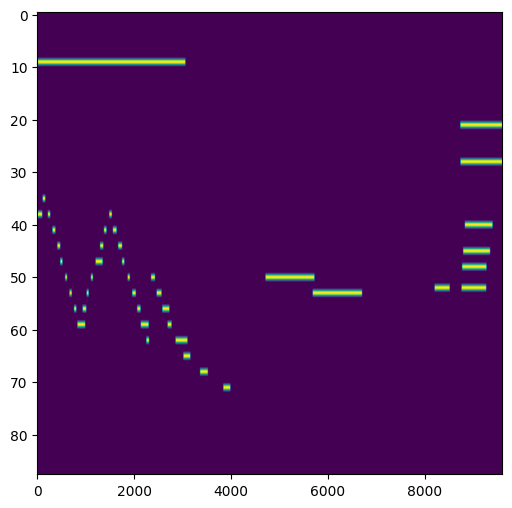

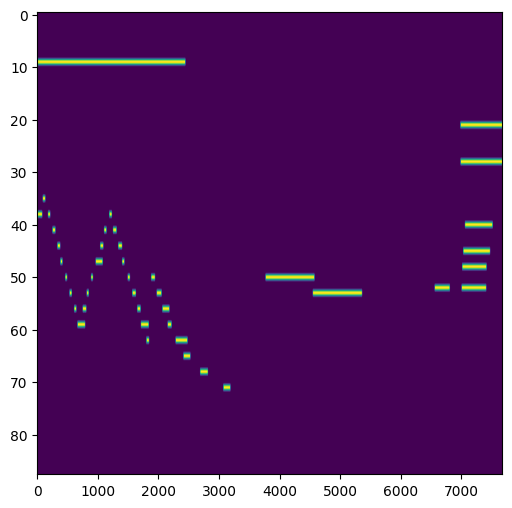

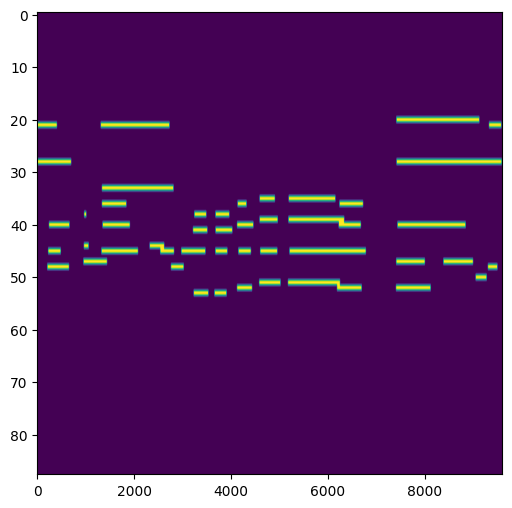

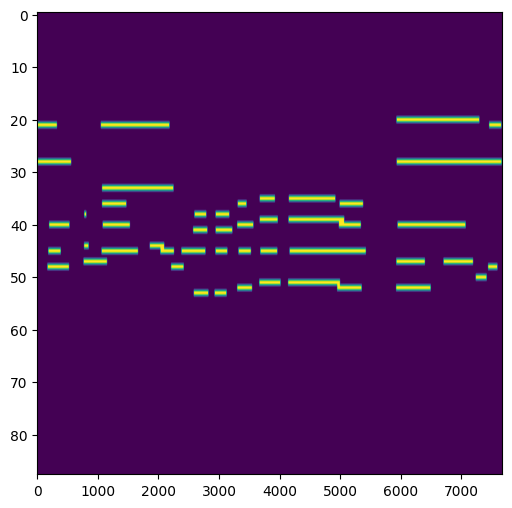

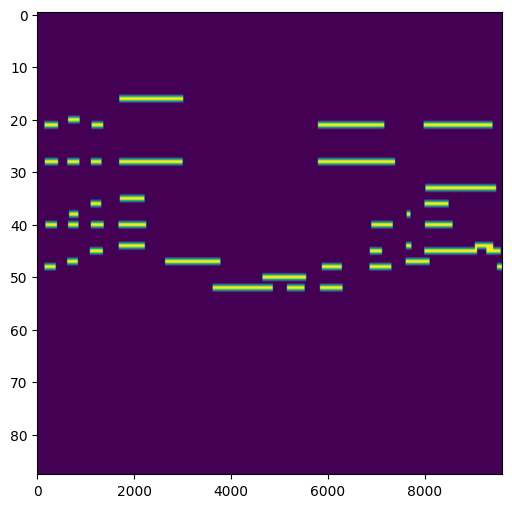

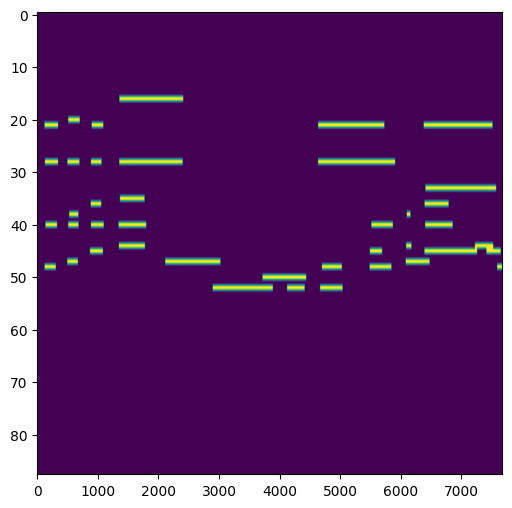

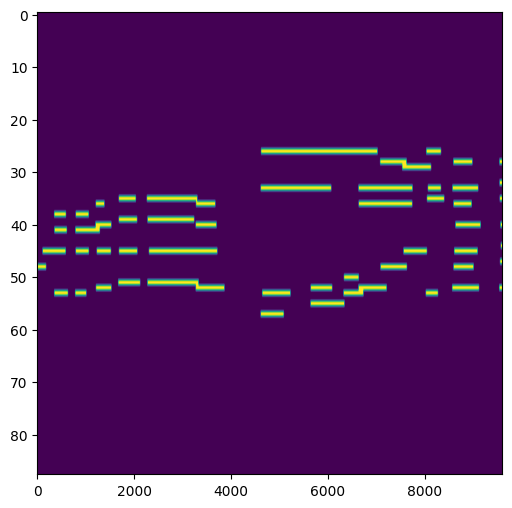

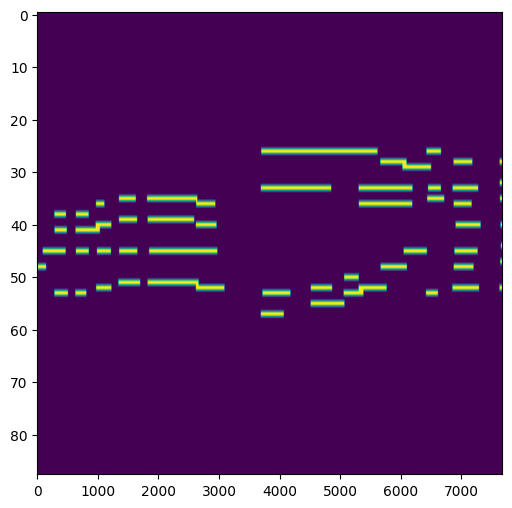

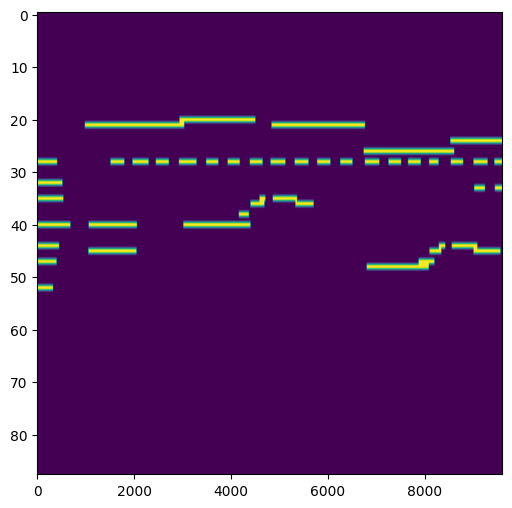

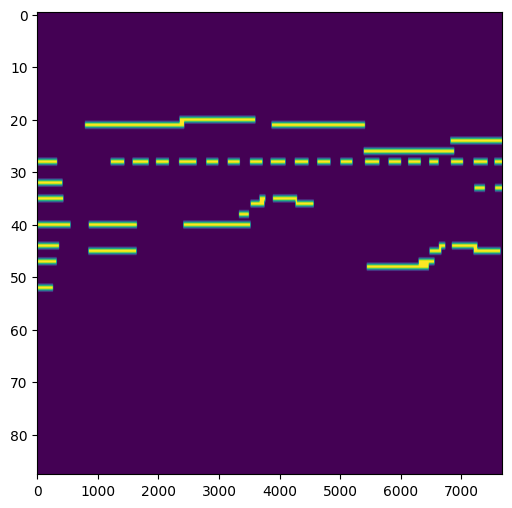

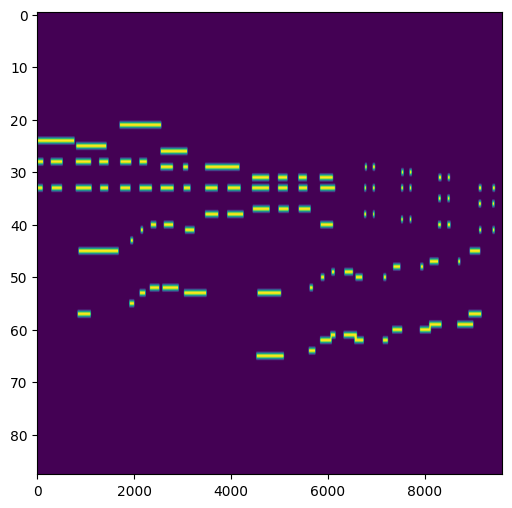

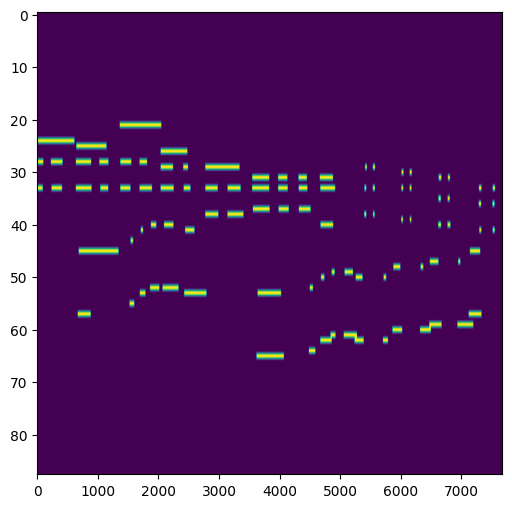

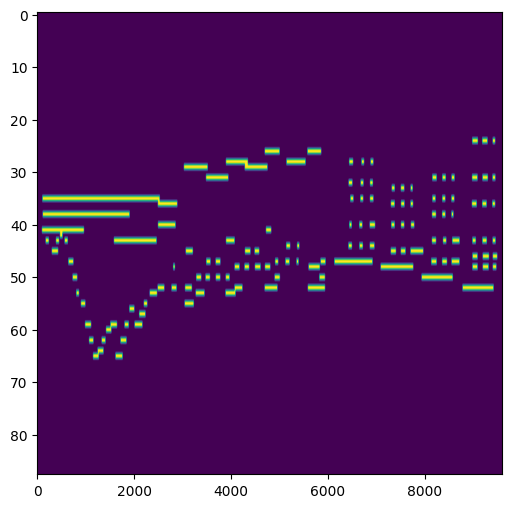

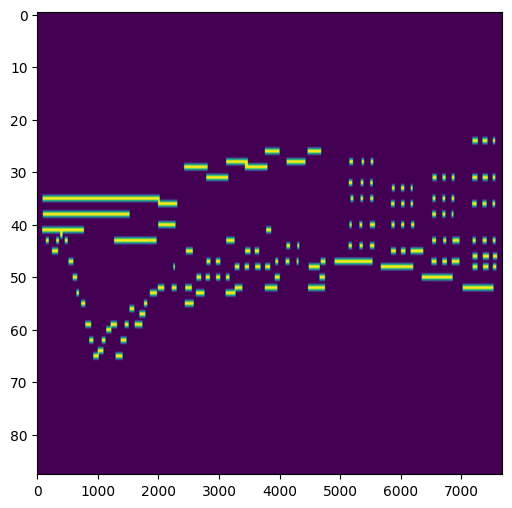

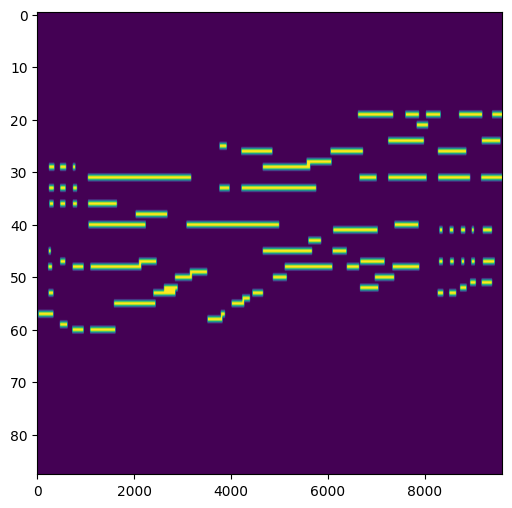

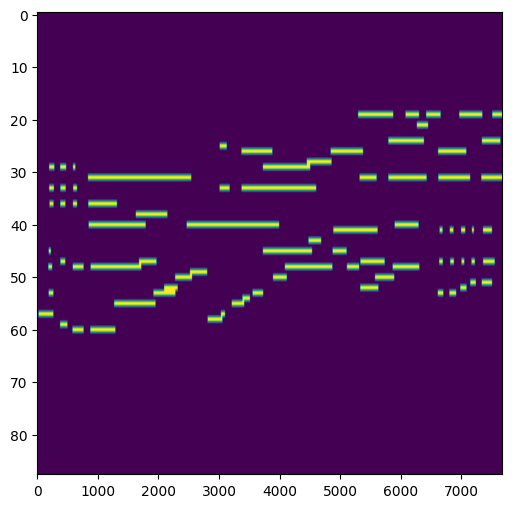

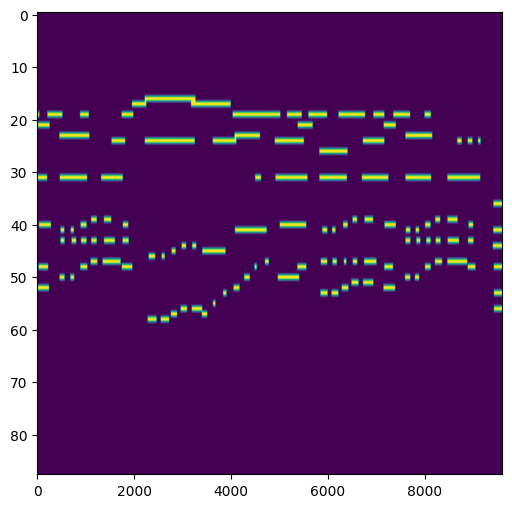

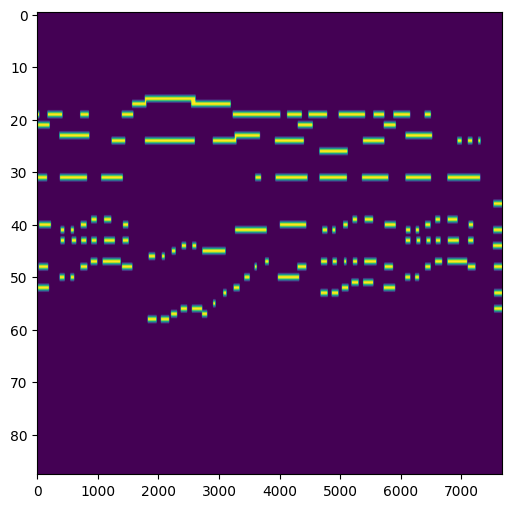

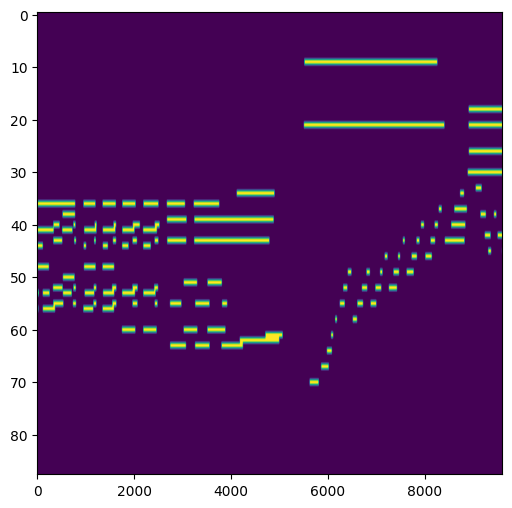

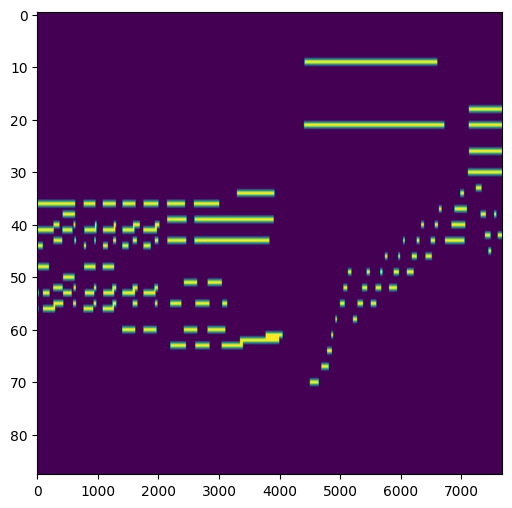

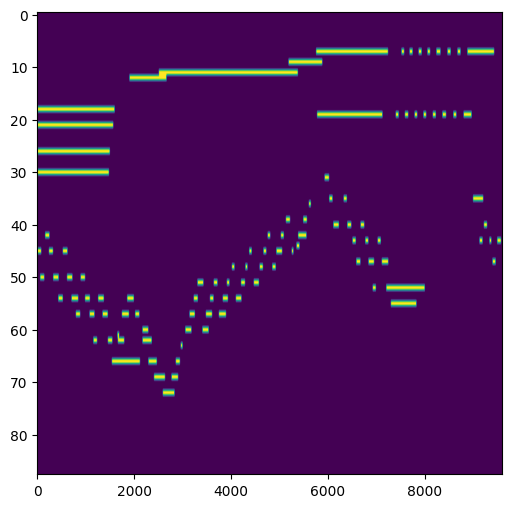

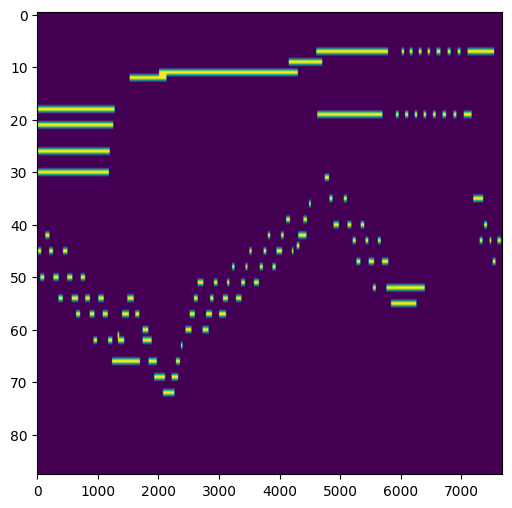

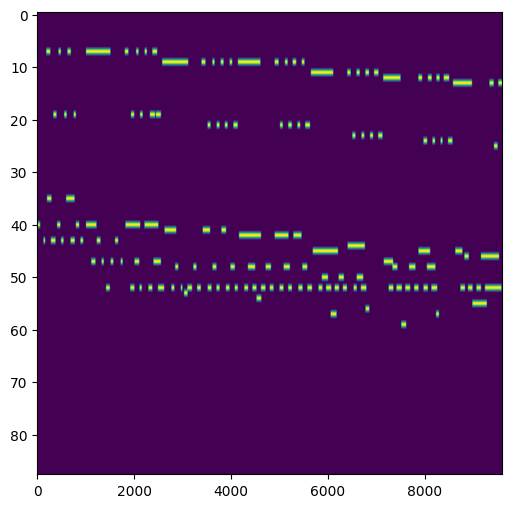

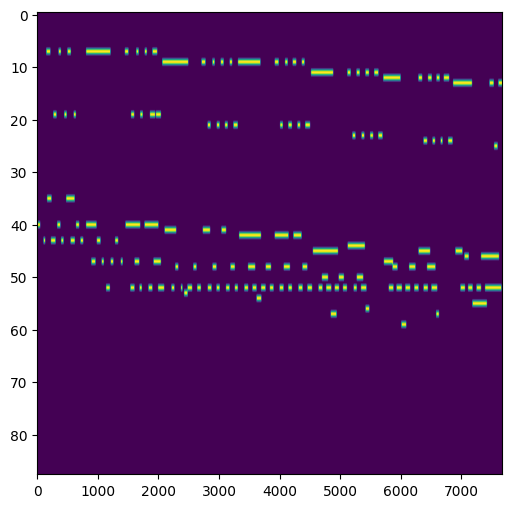

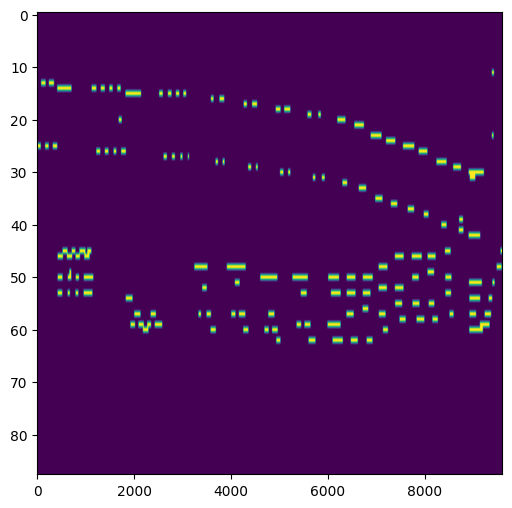

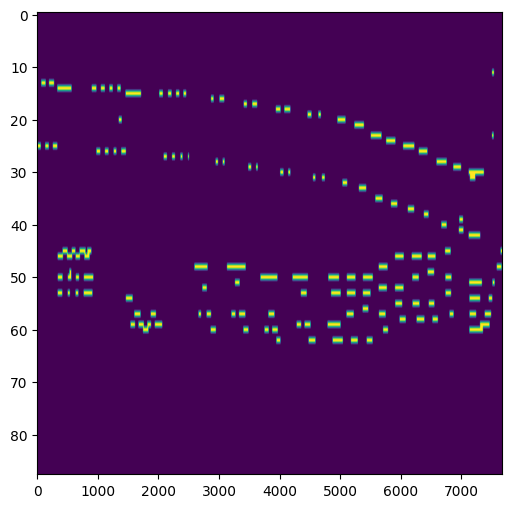

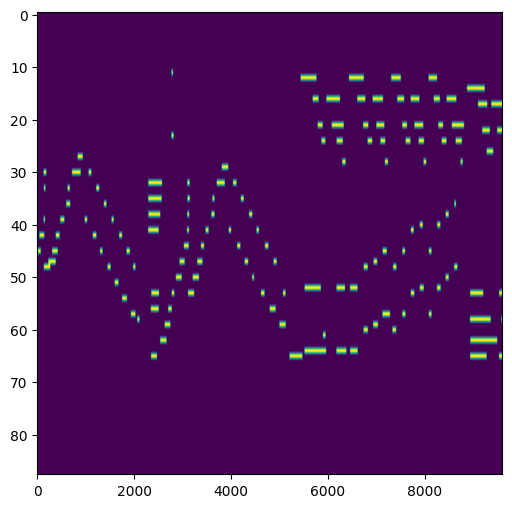

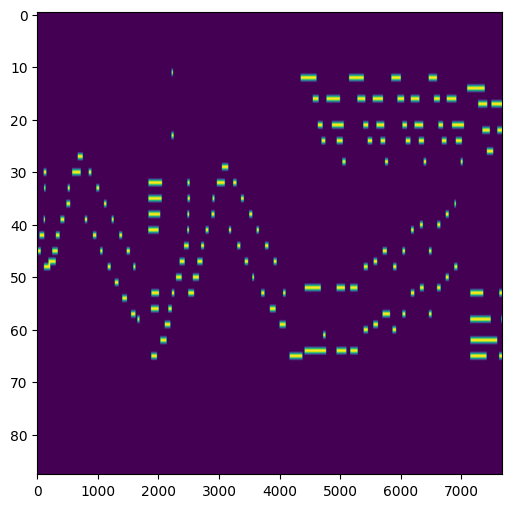

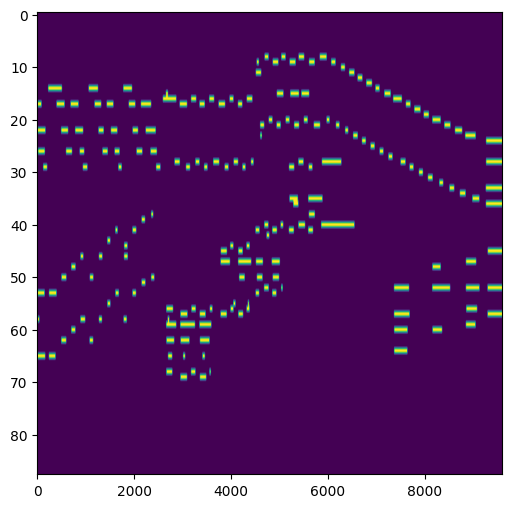

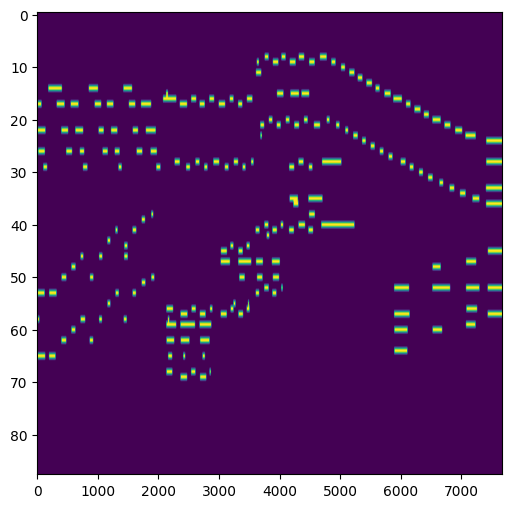

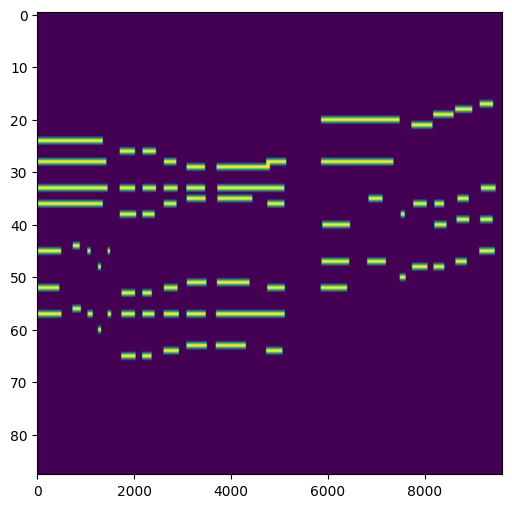

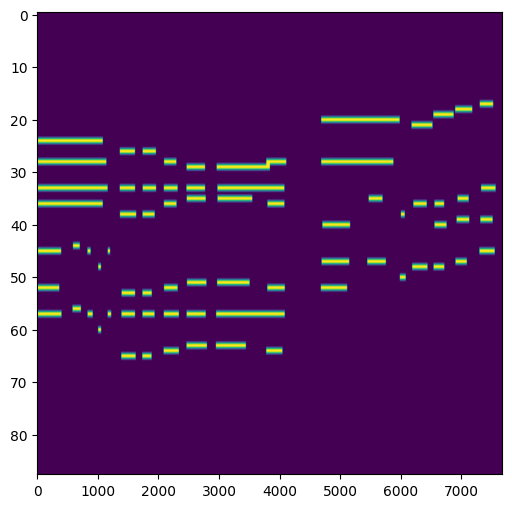

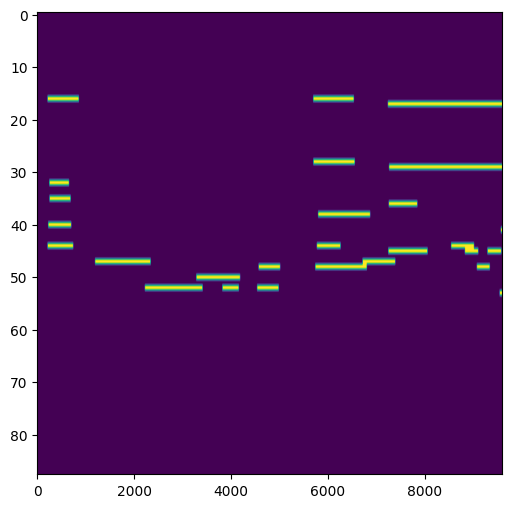

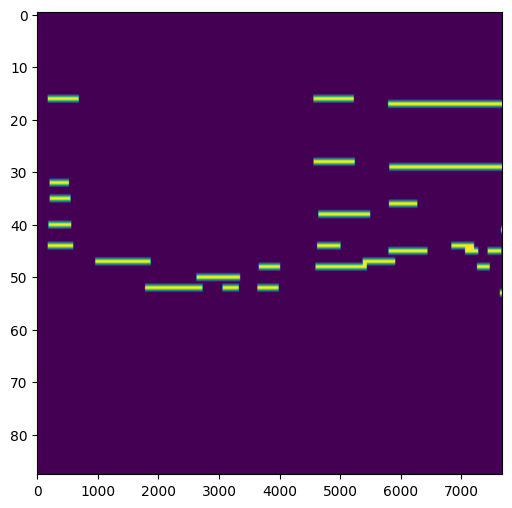

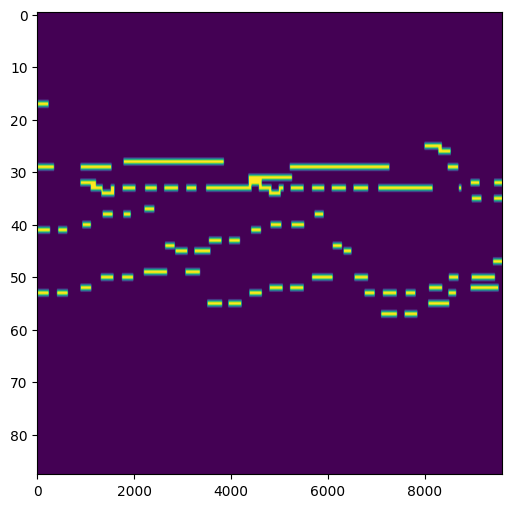

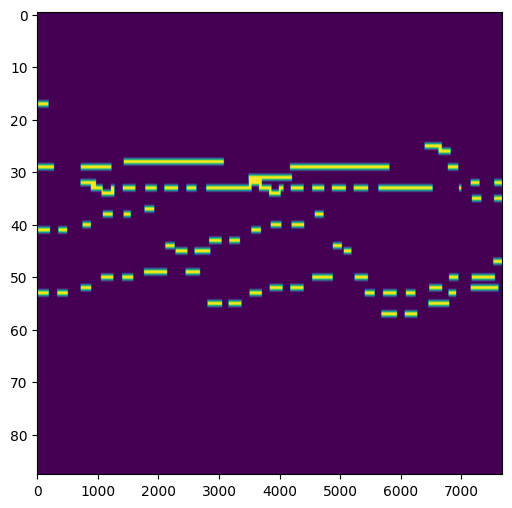

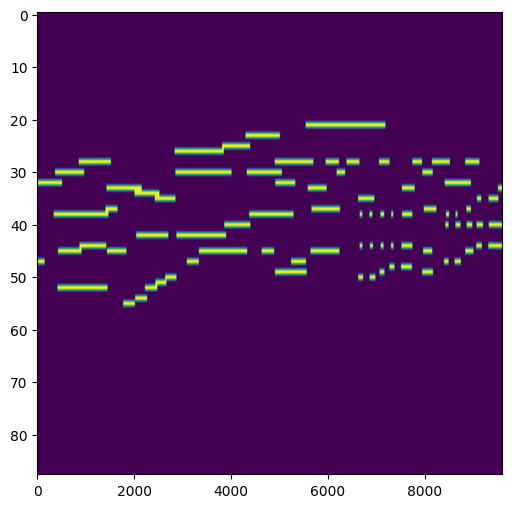

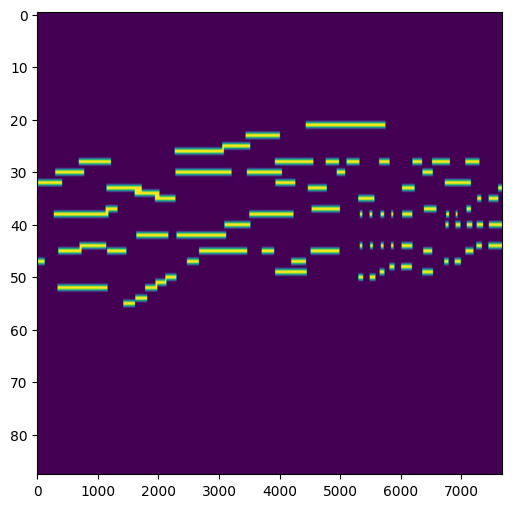

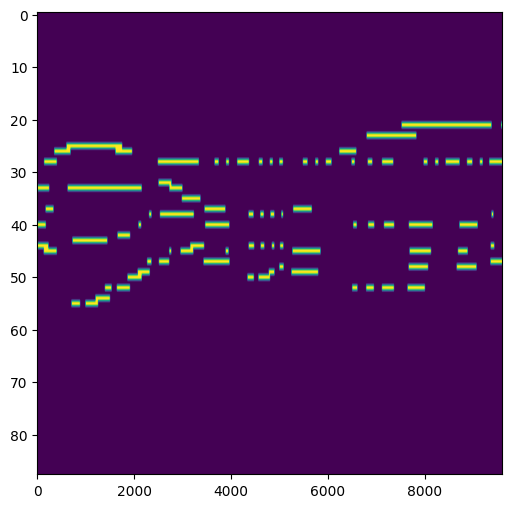

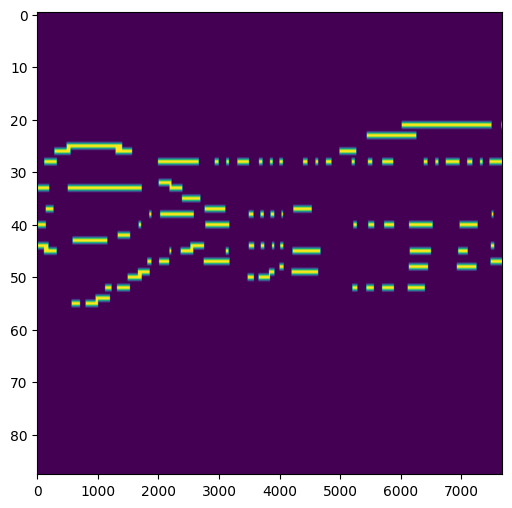

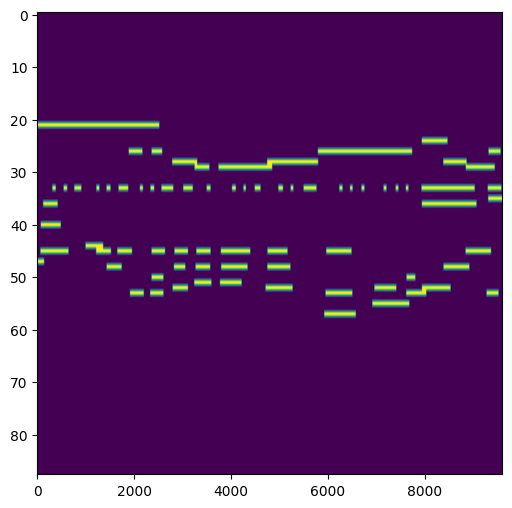

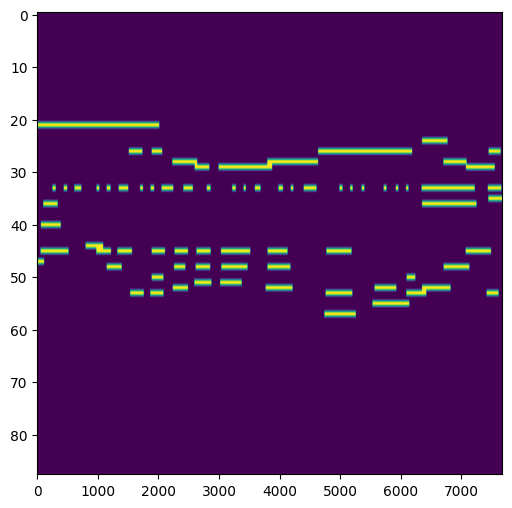

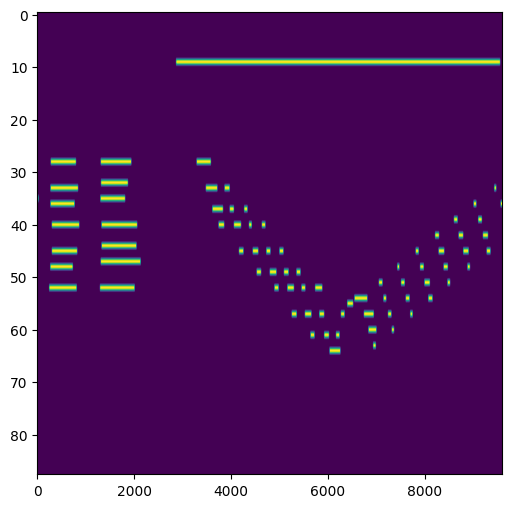

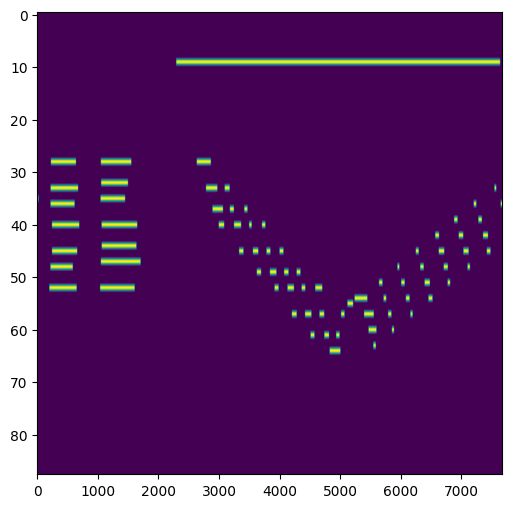

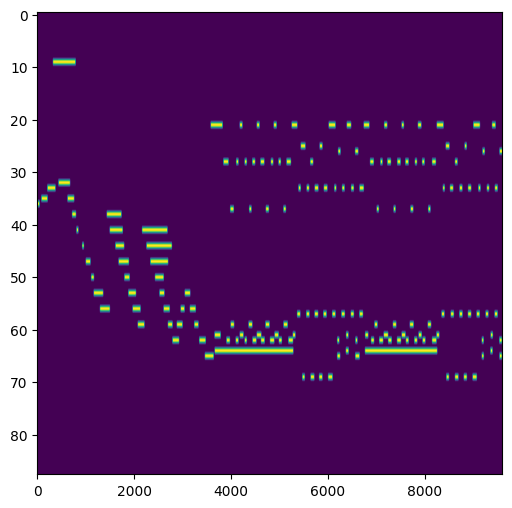

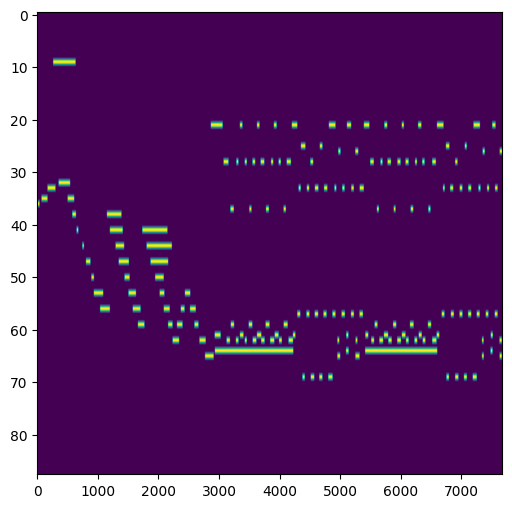

In [9]:
import mido
import time

directory = "maestro-v3.0.0"
save_directory = "mid"
#if not exists(save_directory):
    
#    os.mkdir("./mel")
    
dirnames = ['2017']





fnames = []
for dirs in dirnames:
    for f in os.listdir(join(directory, dirs)):
        fnames.append(join(dirs, f))


for fname in fnames:
    f = fname
    fname = join(directory, fname)
    if(fname[-4:] != 'midi'):
        continue
    #print(fname)
    mid = mido.MidiFile(fname, clip=True)
    
    tempo = 500000
    for msg in mid.tracks[0]:
        if(msg.type == 'set_tempo'):
            tempo = msg.tempo
            break

    mlen = mid.length
    mticks = mid.ticks_per_beat
    #print(mticks)
    out = np.zeros((88, int(mido.second2tick(mlen, mticks, tempo))+1), dtype=np.int8)
    indxs = np.zeros(88)
    curtime = 0
    
    

    for msg in mid.tracks[1]:            
        
        for i in range(msg.time):
            out[:, curtime + i] = indxs # maybe copy
        curtime += msg.time

        if msg.type == 'note_on':
            on_value = 1 if msg.velocity != 0 else 0
            if(on_value):
                indxs[msg.note - 21] = 1
            else:
                indxs[msg.note - 21] = 0

    while(curtime < out.shape[1]):
        out[:, curtime] = indxs
        curtime += 1
        
    t = int(mido.second2tick(10, mticks, tempo))

    #print(mticks)

    for i in range(0, out.shape[1], t):
        if(i+t > out.shape[1]):
            break
        #
        if(mticks != 384):
            tempt = int(mido.second2tick(10, 384, tempo))
            fig, ax = plt.subplots(figsize=(6,6))
            ax.imshow(out[:, i:i+t], aspect='auto')
            temp = sk.transform.resize(out[:, i:i+t], (88, tempt), order=0)
            fig, ax = plt.subplots(figsize=(6,6))
            ax.imshow(temp.astype(np.int8), aspect='auto')
            print(temp.shape)
        else:
            fig, ax = plt.subplots(figsize=(6,6))
            ax.imshow(out[:, i:i+t], aspect='auto')
            print(save_directory+"/"+f[:-5]+"_"+str(i//(t))+".pt")
        if(i > out.shape[1]/3):
            break

    break

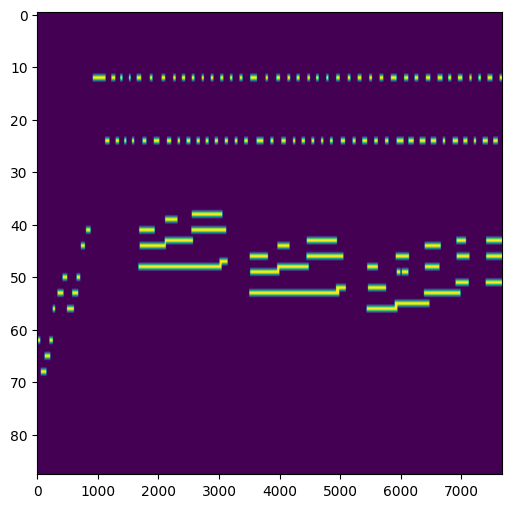

In [16]:

fname = "mid/2008/MIDI-Unprocessed_08_R3_2008_01-05_ORIG_MID--AUDIO_08_R3_2008_wav--3_55.pt"
t = torch.load(fname).numpy()
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(t, aspect='auto')

  